In [ ]:
"""
Author: Benedikt Buhk 
Date: 2025-02-05
Description: verify the results of RASPA2 for the LJ (and Coulombic) potentials.
"""

## imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

## calculate potential with RASPA
You can call RASPA2 from python through the "run_from_python.sh" script. It works similarly to run_auto but takes the x, y and z coordinate of the molecule from the script arguments $1, $2 and $3. Then it outputs the total energy (Host/Adsorbent), the LJ part, the Coulomb part, the real part of the Coulomb, the fourier part of the Coulomb and the alpha convergence/smearing/kappa parameter as text in seperate lines.

### example1: call RASPA(/here just a bash script) with subprocess

In [4]:
import subprocess

# Path to the Bash script
bash_script = "./run_from_python_test.sh"

# Three numbers to pass as arguments
number1 = "10"
number2 = "20"
number3 = "30"

# Run the Bash script with the numbers as arguments
try:
    result = subprocess.run(
        [bash_script, number1, number2, number3],
        check=True,  # Raise an exception if the script fails
        text=True,   # Decode stdout/stderr as text
        capture_output=True  # Capture stdout and stderr
    )
    # Print the output of the Bash script
    print("Bash script output:")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    # Handle errors if the script fails
    print(f"Error running the Bash script: {e}")
    print(f"Script stderr: {e.stderr}")

Bash script output:
Number 1: 10
Number 2: 20
Number 3: 30



### example 2: with !bash run_from_python.sh

In [9]:
x = [5.0, 6.0, 2.5]
y = np.linspace(0.5, 3.0, 100)

In [11]:
x[0]

5.0

In [15]:
script_output = !bash run_from_python.sh {x[2]} 0 0 

In [16]:
script_output

['-20156.68777283',
 '277.72618435',
 '-20434.41395719',
 '-9078.10030102',
 '-11356.31365617',
 '0.341429']

In [34]:
energy = float(script_output[0])
energy

-21146.85159123

In [18]:
a1 = np.array([10,0,0])
a2 = np.array([5,10,0])
a3 = np.array([0,0,10])

R1,R2 = np.meshgrid(np.linspace(0,1,2),np.linspace(0,1,2))
R3 = 0
X = a1[0]*R1+a2[0]*R2+a3[0]*R3
Y = a1[1]*R1+a2[1]*R2+a3[1]*R3
Z = a1[2]*R1+a2[2]*R2+a3[2]*R3

In [42]:
X

array([[ 0., 10.],
       [ 5., 15.]])

In [43]:
Y

array([[ 0.,  0.],
       [10., 10.]])

In [47]:
for i in range(2):
    for j in range(2):
        print(f"x={X[i,j]};  \ty={Y[i,j]}")

x=0.0;  	y=0.0
x=10.0;  	y=0.0
x=5.0;  	y=10.0
x=15.0;  	y=10.0


In [ ]:
R1,R2 = np.meshgrid(np.linspace(0,1,20),np.linspace(0,1,20))
R3 = 0
X = a1[0]*R1+a2[0]*R2+a3[0]*R3
Y = a1[1]*R1+a2[1]*R2+a3[1]*R3
Z = a1[2]*R1+a2[2]*R2+a3[2]*R3
V_lr = ewald(1,6,R1,R2,R3)
V_lr = np.clip(V_lr,-1e5,1e5)

f,ax = plt.subplots()
p = ax.contourf(X,Y,V_lr,levels=200)
f.colorbar(p)
ax.set_aspect('equal', 'box')
plt.plot(a1_xyz[0], a1_xyz[1],'ro')
plt.plot(a2_xyz[0], a2_xyz[1],'ro')
plt.plot(a3_xyz[0], a3_xyz[1],'ro')

## calculate grid with RASPA

In [40]:
a1 = np.array([10,0,0])
a2 = np.array([5,10,0])
a3 = np.array([0,0,10])

In [44]:
resolution = 2
R1,R2 = np.meshgrid(np.linspace(0,1,2),np.linspace(0,1,2))
R3 = 0
X = a1[0]*R1+a2[0]*R2+a3[0]*R3
Y = a1[1]*R1+a2[1]*R2+a3[1]*R3
Z = a1[2]*R1+a2[2]*R2+a3[2]*R3

In [45]:
for i in range(resolution):
    for j in range(resolution):
        print(f"x={X[i,j]};  \ty={Y[i,j]}")

x=0.0;  	y=0.0
x=10.0;  	y=0.0
x=5.0;  	y=10.0
x=15.0;  	y=10.0


In [33]:
energy = np.zeros((resolution,resolution))
LJ = np.zeros((resolution,resolution))
Coulomb_ewald = np.zeros((resolution,resolution))
Coulomb_real = np.zeros((resolution,resolution))
Coulomb_fourier = np.zeros((resolution,resolution))
alpha = np.zeros((resolution,resolution))

for i in range(resolution):
    for j in range(resolution):       
        script_output = !bash run_from_python.sh {X[i,j]} {Y[i,j]} 0
        energy[i,j] = float(script_output[0])
        LJ[i,j] = float(script_output[1])
        Coulomb_ewald[i,j] = float(script_output[2])
        Coulomb_real[i,j] = float(script_output[3])
        Coulomb_fourier[i,j] = float(script_output[4])
        alpha[i,j] = float(script_output[5])

In [34]:
df = pd.DataFrame(data = {'X':X.flatten(),'Y':Y.flatten(),'energy':energy.flatten(),'LJ':LJ.flatten(),\
        'Coulomb_ewald':Coulomb_ewald.flatten(),'Coulomb_real':Coulomb_real.flatten(), \
            'Coulomb_fourier':Coulomb_fourier.flatten(), 'alpha':alpha.flatten()})
df.to_csv('zz_results/test_3_atoms_with_alpha__again.csv',index=False)
df

,X,Y,energy,LJ,Coulomb_ewald,Coulomb_real,Coulomb_fourier,alpha
0,0.000000,0.0,-inf,-27.886863,-inf,-inf,-16331.794825,0.341429
1,0.526316,0.0,-1.450592e+05,-31.049473,-1.450282e+05,-1.285857e+05,-16442.455660,0.341429
2,1.052632,0.0,-6.626592e+04,-32.120951,-6.623379e+04,-5.040110e+04,-15832.690177,0.341429
3,1.578947,0.0,1.368377e+05,176899.633793,-4.006194e+04,-2.547977e+04,-14582.171997,0.341429
4,2.105263,0.0,-2.226225e+04,4569.801796,-2.683205e+04,-1.398339e+04,-12848.654365,0.341429
...,...,...,...,...,...,...,...,...
395,12.894737,10.0,-1.808777e+04,4590.728188,-2.267850e+04,-1.248719e+04,-10191.303591,0.341429
396,13.421053,10.0,1.407076e+05,176929.651090,-3.622204e+04,-2.397743e+04,-12244.609760,0.341429
397,13.947368,10.0,-6.327583e+04,-17.447218,-6.325839e+04,-4.916600e+04,-14092.383374,0.341429
398,14.473684,10.0,-1.434240e+05,-22.927421,-1.434010e+05,-1.278873e+05,-15513.781395,0.341429


In [25]:
a1_k = [0.25,0.75,0.25]
a2_k = [.25,.5,.75]
a3_k = [0, 0, 0]#[0]*3
lattice = np.array([a1,a2,a3])
lattice_k = np.array([a1_k,a2_k,a3_k])
a1_xyz = a1_k @ lattice
a2_xyz = a2_k @ lattice
a3_xyz = a3_k @ lattice

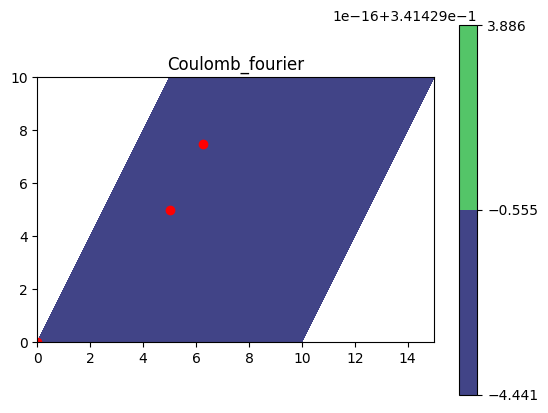

In [27]:
f,ax = plt.subplots()
p = ax.contourf(X,Y,alpha,levels=resolution*10)
f.colorbar(p)
ax.set_aspect('equal', 'box')
plt.title('Coulomb_fourier')
plt.plot(a1_xyz[0], a1_xyz[1],'ro')
plt.plot(a2_xyz[0], a2_xyz[1],'ro')
plt.plot(a3_xyz[0], a3_xyz[1],'ro')

In [79]:
df_loaded = pd.read_csv('results/test_3_atoms_spaliato.csv')

In [82]:
X_loaded = df_loaded['X'].values.reshape(resolution,resolution)
Y_loaded = df_loaded['Y'].values.reshape(resolution,resolution)
Coulomb_ewald_loaded = df_loaded['Coulomb_ewald'].values.reshape(resolution,resolution)

assert np.allclose(X,X_loaded)
assert np.allclose(Y,Y_loaded)
assert np.allclose(Coulomb_ewald,Coulomb_ewald_loaded)

Text(0.5, 1.0, 'Coulomb_fourier')

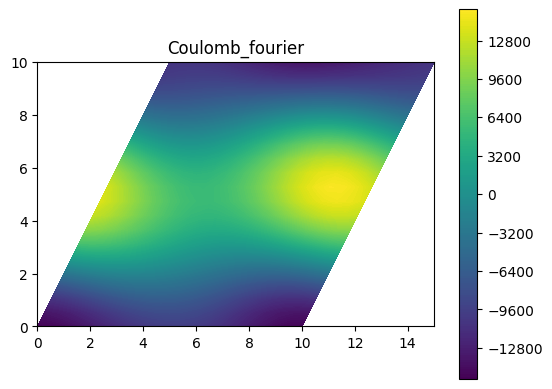

In [77]:
f,ax = plt.subplots()
p = ax.contourf(X,Y,Coulomb_fourier,levels=resolution*10)
f.colorbar(p)
ax.set_aspect('equal', 'box')
plt.title('Coulomb_fourier')

In [ ]:
f,ax = plt.subplots()
p = ax.contourf(X,Y,Coulomb_fourier,levels=resolution*10)
f.colorbar(p)
ax.set_aspect('equal', 'box')
plt.title('Coulomb_fourier')

## 3D:

In [50]:
resolution = 2
R1,R2,R3 = np.meshgrid(np.linspace(0,1,resolution),np.linspace(0,1,resolution),np.linspace(0,1,resolution))
X = a1[0]*R1+a2[0]*R2+a3[0]*R3
Y = a1[1]*R1+a2[1]*R2+a3[1]*R3
Z = a1[2]*R1+a2[2]*R2+a3[2]*R3

In [55]:
energy = np.zeros((resolution,resolution,resolution))
LJ = np.zeros((resolution,resolution,resolution))
Coulomb_ewald = np.zeros((resolution,resolution,resolution))
Coulomb_real = np.zeros((resolution,resolution,resolution))
Coulomb_fourier = np.zeros((resolution,resolution,resolution))
alpha = np.zeros((resolution,resolution,resolution))

for i in range(resolution):
    for j in range(resolution):  
        for k in range(resolution):
            #print(f"x={X[i,j,k]};  \ty={Y[i,j,k]};  \tz={Z[i,j,k]}")
            script_output = !bash run_from_python.sh {X[i,j,k]} {Y[i,j,k]} {Z[i,j,k]}
            energy[i,j,k] = float(script_output[0])
            LJ[i,j,k] = float(script_output[1])
            Coulomb_ewald[i,j,k] = float(script_output[2])
            Coulomb_real[i,j,k] = float(script_output[3])
            Coulomb_fourier[i,j,k] = float(script_output[4])
            alpha[i,j,k] = float(script_output[5])

In [57]:
df = pd.DataFrame(data = {'X':X.flatten(),'Y':Y.flatten(), 'Z':Z.flatten(),'energy':energy.flatten(),'LJ':LJ.flatten(),\
        'Coulomb_ewald':Coulomb_ewald.flatten(),'Coulomb_real':Coulomb_real.flatten(), \
            'Coulomb_fourier':Coulomb_fourier.flatten(), 'alpha':alpha.flatten()})
df.to_csv('zz_results/test_3_atoms_with_alpha_3D.csv',index=False)
df

,X,Y,Z,energy,LJ,Coulomb_ewald,Coulomb_real,Coulomb_fourier,alpha
0,0.0,0.0,0.0,-inf,-27.886863,-inf,-inf,-16331.794825,0.341429
1,0.0,0.0,10.0,-7.525564e+19,-27.886863,-7.525564e+19,-7.525564e+19,-16331.794825,0.341429
2,10.0,0.0,0.0,-7.525564e+19,-27.886863,-7.525564e+19,-7.525564e+19,-16331.794825,0.341429
3,10.0,0.0,10.0,-5.321377e+19,-27.886863,-5.321377e+19,-5.321377e+19,-16331.794825,0.341429
4,5.0,10.0,0.0,-9.271626e+09,-27.887005,-9.271626e+09,-9.271610e+09,-16331.804148,0.341429
5,5.0,10.0,10.0,-9.271626e+09,-27.887005,-9.271626e+09,-9.271610e+09,-16331.804148,0.341429
6,15.0,10.0,0.0,-9.271626e+09,-27.887005,-9.271626e+09,-9.271610e+09,-16331.804148,0.341429
7,15.0,10.0,10.0,-9.271626e+09,-27.887005,-9.271626e+09,-9.271610e+09,-16331.804148,0.341429


## old verifcation LJ & coulomb

In [1]:
def LJ_12_6(r, sigma, epsilon):
    """Lennard-Jones 12-6 potential"""
    return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

In [4]:
# calculate the LJ parameters for the mixture with the Lorentz-Berthelot mixing rules

# solid-atom: C (carbon) (parameters from UFF as in force_field_mixing_rules.py)
sig1 = 3.4309
eps1 = 52.8435

# adsorbate-molecule/atom 'XX'
sig2 = 3.21
eps2 = 77.77

sigma = (sig1 + sig2) / 2   
epsilon = np.sqrt(eps1 * eps2)

In [7]:
def plot_lj_potential(d, sigma, epsilon):
    r = np.linspace(2.0, 12.0, 500)

    plt.figure(figsize=(10, 6))
    #for atom, color in zip(results.keys(), colors):
    print(f"sigma: {sigma}, epsilon: {epsilon}")
    plt.plot(r, LJ_12_6(r, sigma, epsilon))
    plt.plot(d, LJ_12_6(d, sigma, epsilon), "ro", label=f"r = {d:.2f} Å, LJ = {LJ_12_6(d, sigma, epsilon):.8f} K")
    plt.title("Lennard-Jones (6-12) Interaction Potential", fontsize=16)
    plt.xlabel("Distance (r) [Å]", fontsize=14)
    plt.ylabel("LJ Potential [K]", fontsize=14)
    plt.xlim(2.0, 12.0)
    plt.ylim(-100, 100)   
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

sigma: 3.32045, epsilon: 64.10646609352288


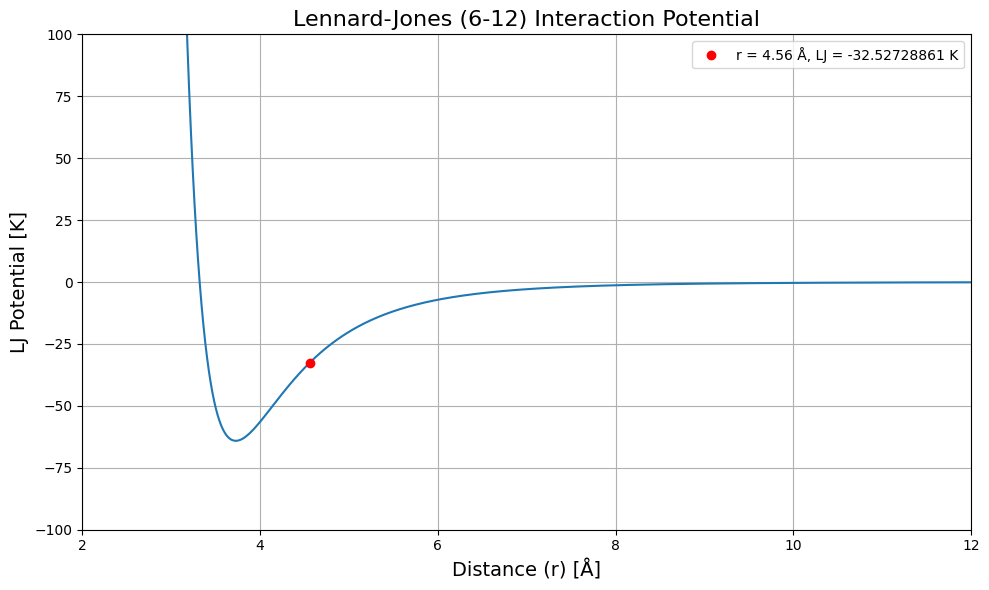

In [8]:
# plot the LJ potential
d = 4.56 # distance as in the RASPA2 simulation
plot_lj_potential(d, sigma, epsilon)

In [9]:
lj = LJ_12_6(d, sigma, epsilon)
print(f"lj: {lj:.8f} K")

lj: -32.52728861 K


So for the two atoms with the above LJ parameter we expect a LJ interaction energy of -32.52728861 K. This is also calculated with RASPA2 as you can see in the output file under Output/System0/ in line 632 (Host/Adsorbate VDW energy). (as the unitcell is very large and the LJ-cutoff is set to 20, there is only this single pair-interaction considered)

In [10]:
def coulombic_interaction(r: np.ndarray, charge1: float, charge2:float) -> np.ndarray: 
    """ 
     calculate the Coulombic interaction between a given atoms charge and C atom (charge = 0.7 e) at given distance r
     input: r: np.array, distance in Å
            charge1: float, charge in e
            charge2: float, charge in e
        output: 
        - Coulombic interaction: np.array  [K]
    """
    kb = 1.380648 * 10**-23  # J/K
    inv_4_epsi0 = 1 / (4 * np.pi * 8.8541878128 * 10**-12)  # C^2 / J m = C^2 s^2 / kg m^3
    charge_e_to_c = 1.602176634 * 10**-19  # C
    factor_coulomb = (
    inv_4_epsi0 * charge_e_to_c**2 / kb / 10**-10
    )  # 10**-10 to convert to Angstrom -> [K * Angstrom]
    return factor_coulomb * charge1 * charge2 / r

In [11]:
charge1 = 0.42
charge2 = 0.37

In [12]:
coulombic_interaction(4.56, charge1, charge2)

5694.628499162692

The single pair coulombic interaction is a bit tricky to reproduce as the Ewald Sum also considers the periodic replicas of the unitcell so this value for now just serves as a rough reference.